<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/TugasEDA_dan_Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('train.csv')

In [47]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df.shape

(1259, 81)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [50]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,218
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


#lakukan data understanding dan data visualization

#Handling categorical missing values

In [51]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

In [52]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#Handling numeric missing values

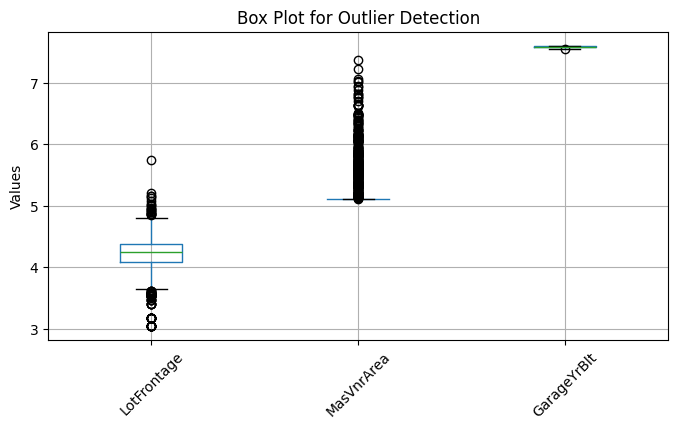

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [54]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

In [55]:
# Get columns that contain 'Yr' or 'Year'
year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

# Convert year values into age-related features
for col in year_columns:
    df[col] = df['YrSold'] - df[col]

#Feature transformation

In [56]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
GrLivArea       1.186075
LotArea        12.348242
LotFrontage    -1.024363
MSSubClass      1.404451
SalePrice       1.963159
dtype: float64


In [57]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])

#Convert categorical features to numerical values

In [58]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['SalePrice'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)

In [59]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [87]:
df.LotArea.unique()

array([2.20187173, 2.21588476, 2.23303386, 2.21531511, 2.25813294,
       2.25706388, 2.2212346 , 2.2243888 , 2.16554095, 2.18739132,
       2.23255623, 2.23925208, 2.24815426, 2.22716119, 2.2298371 ,
       2.23294806, 2.22855826, 2.25389746, 2.18948655, 2.25780246,
       2.18782892, 2.2174848 , 2.12208641, 2.19916531, 2.25791275,
       2.18400833, 2.23518247, 2.27214732, 2.16929449, 2.202524  ,
       2.20309449, 2.23109932, 2.22614355, 2.1857601 , 2.25174984,
       2.22923447, 2.20293923, 2.19471019, 2.16403074, 2.20455752,
       2.2757651 , 2.21099406, 2.21123254, 2.19503308, 2.1909277 ,
       2.24695797, 2.23155514, 2.12847058, 2.19214674, 2.25522211,
       2.1677655 , 2.20215926, 2.38187524, 2.18297096, 2.22220864,
       2.06438201, 2.23672647, 2.25379775, 2.24899736, 2.17140457,
       2.22353097, 2.21329496, 2.21578247, 2.29238071, 2.2272927 ,
       2.13245482, 2.26743214, 2.25355955, 2.19006254, 2.22184585,
       2.22247454, 2.15916353, 1.99813058, 2.2021984 , 2.20426

#Data Visualization

#Univariate Analysis

GarageYrBlt

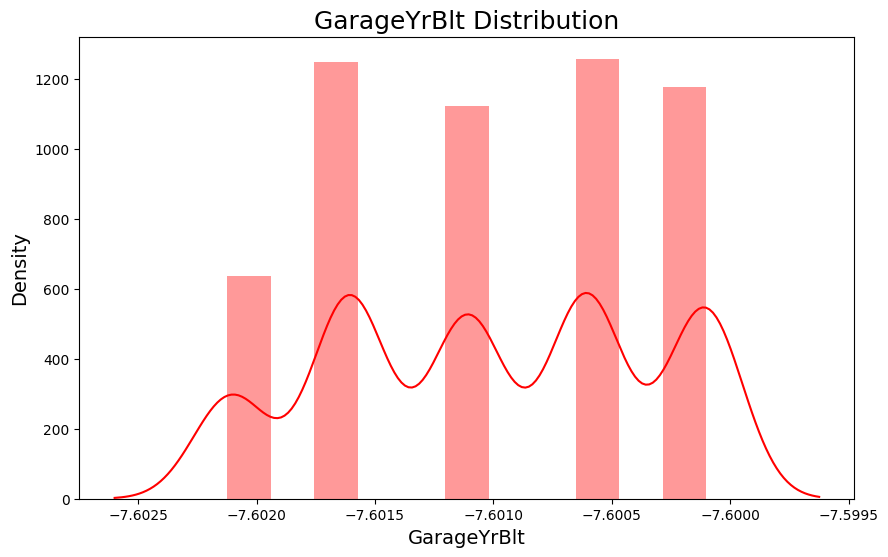

In [88]:
plt.figure(figsize=(10,6))
sns.distplot(df.GarageYrBlt,color='r')
plt.title('GarageYrBlt Distribution',size=18)
plt.xlabel('GarageYrBlt',size=14)
plt.ylabel('Density',size=14)
plt.show()

SalePrice

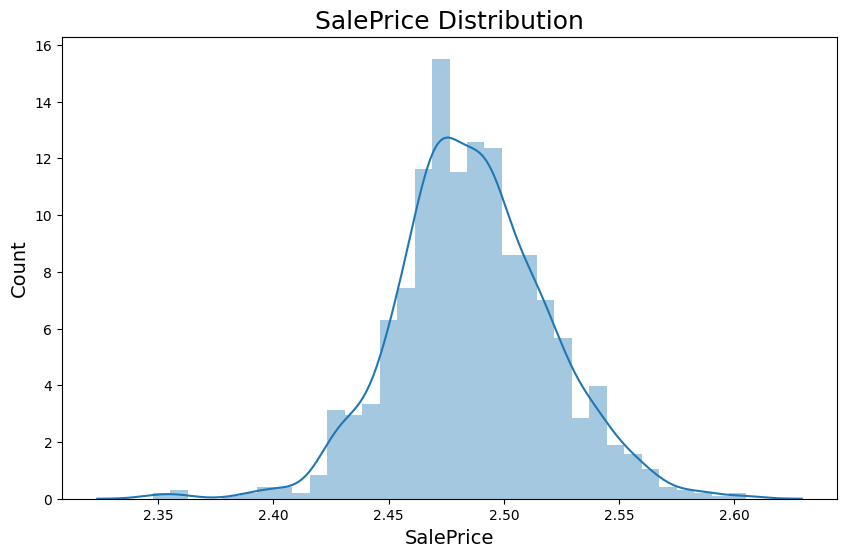

In [89]:
plt.figure(figsize=(10,6))
sns.distplot(df['SalePrice'])
plt.title('SalePrice Distribution',size=18)
plt.xlabel('SalePrice',size=14)
plt.ylabel('Count',size=14)
plt.show()

#Univariate Analysis for Categorical Features

LotShape

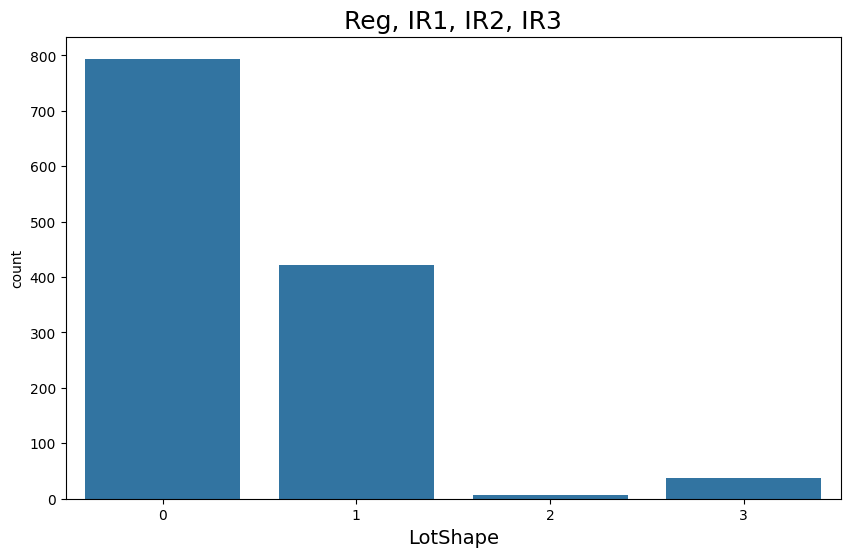

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(x='LotShape',data=df)
plt.title('Reg, IR1, IR2, IR3', size=18)
plt.xlabel('LotShape',size=14)
plt.show()

Fireplaces

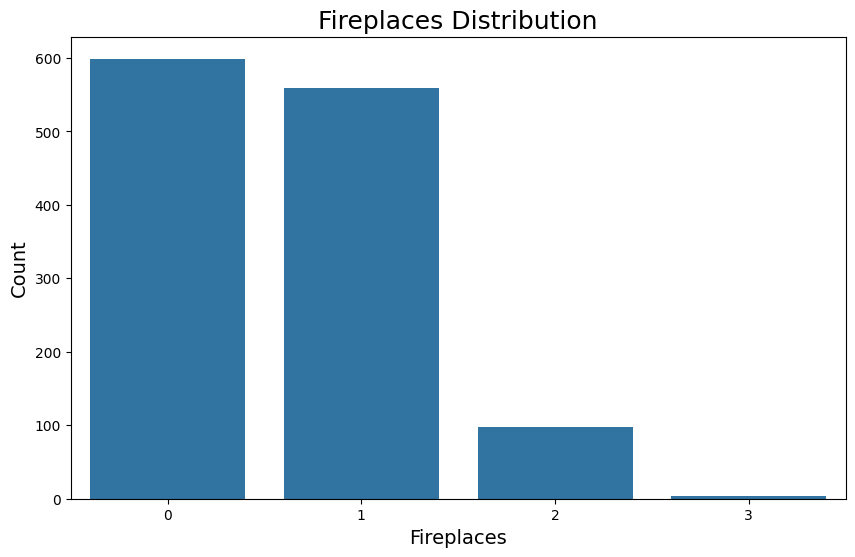

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(x='Fireplaces',data=df)
plt.title('Fireplaces Distribution',size=18)
plt.xlabel('Fireplaces',size=14)
plt.ylabel('Count',size=14)
plt.show()

Fence

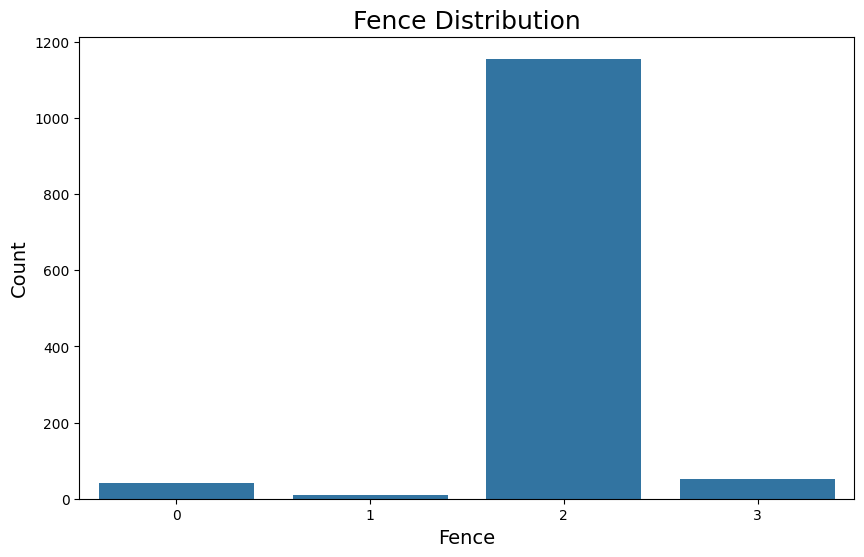

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x='Fence',data=df)
plt.title('Fence Distribution',size=18)
plt.xlabel('Fence',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [93]:
df.Fence.value_counts()

,count
Fence,
2,1156
3,51
0,42
1,10


Functional

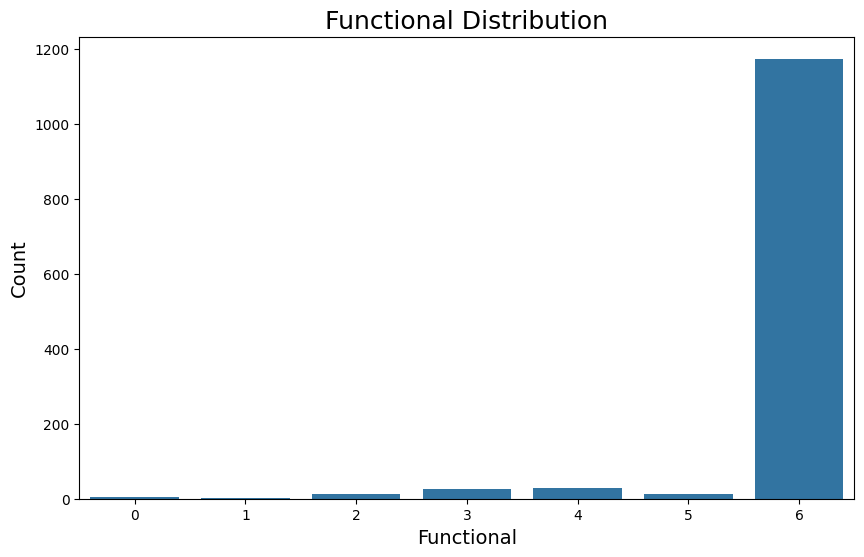

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(x='Functional',data=df)
plt.title('Functional Distribution',size=18)
plt.xlabel('Functional',size=14)
plt.ylabel('Count',size=14)
plt.show()

Bivariate Analysis

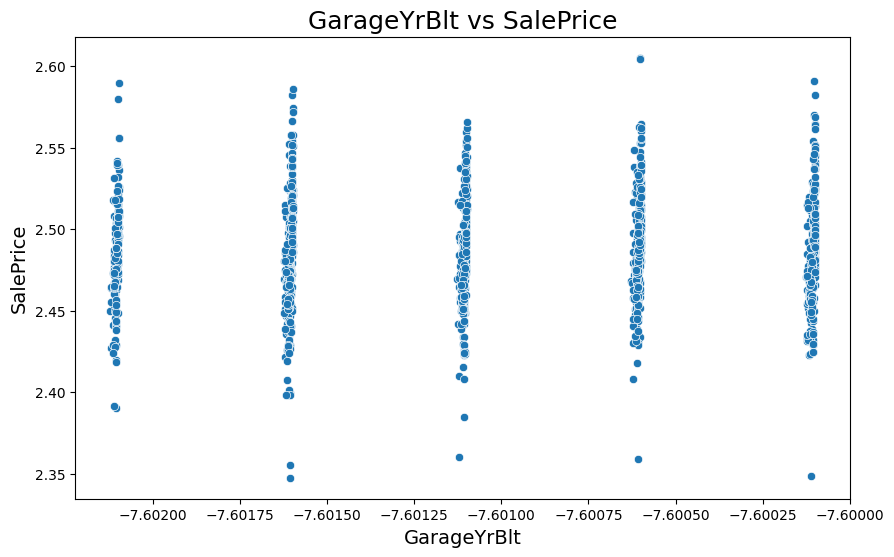

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=df)
plt.title('GarageYrBlt vs SalePrice',size=18)
plt.xlabel('GarageYrBlt',size=14)
plt.ylabel('SalePrice',size=14)
plt.show()

Text(0.5, 1.0, 'Fence vs SalePrice')

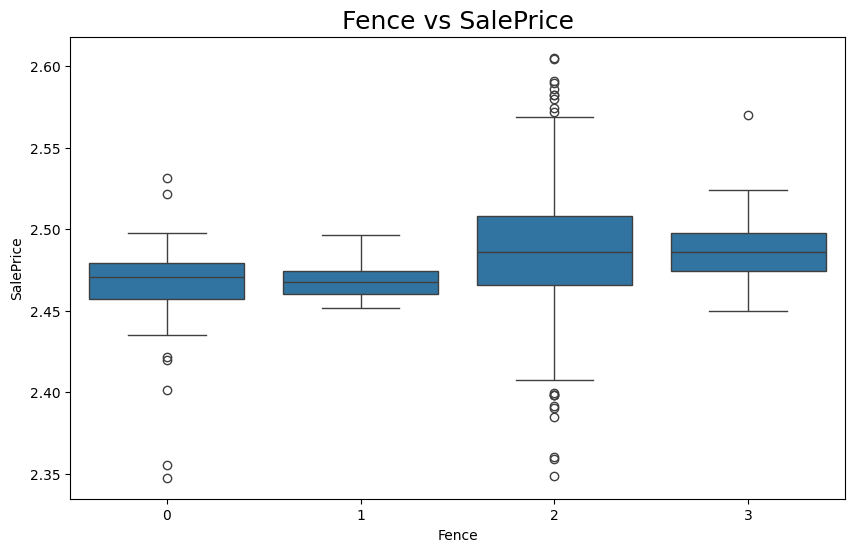

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fence',y= 'SalePrice',data=df)
plt.title('Fence vs SalePrice',size=18)

#Multivariate Analysis

#Handling categorical missing values

In [97]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

#Handling numeric missing values

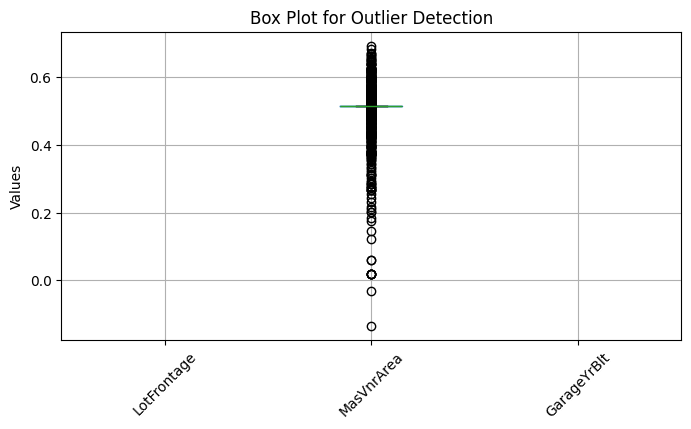

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [99]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

#Creating new features

In [100]:
# Get columns that contain 'Yr' or 'Year'
year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

# Convert year values into age-related features
for col in year_columns:
    df[col] = df['YrSold'] - df[col]

#Feature transformation

In [101]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
MSSubClass    1.404451
MasVnrArea   -3.307442
dtype: float64


In [102]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])

#Convert categorical features to numerical values

In [103]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['SalePrice'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)

In [104]:
categorical_columns

Index([], dtype='object')

In [105]:
encoding_maps = {}

for col in categorical_columns:
    labels_ordered = df.groupby([col])['SalePrice'].mean().sort_values().index
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}
    df[col] = df[col].map(labels_ordered)
    encoding_maps[col] = labels_ordered  # Simpan hasil encoding tiap kolom

# Tampilkan encoding map untuk semua kolom
for col, mapping in encoding_maps.items():
    print(f"Encoding for {col}:")
    print(mapping)
    print()